<br/>
<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Présentation du problème
</h1>
<br/>

<p>
Lorsqu'une banque prete de l'argent à une personne, elle prend le risque que cette dernière ne rembourse pas l'intégralité dans les délais convenus. Ce risque s'appelle risque de crédit. Ainsi, avant d'octroyer du crédit, la banque vérifie si la personne demandant le pret sera capable de rembourser. Cette analyse est effectuée manuellement par plusieurs banques, ce qui est couteux en ressources financières. 
</p>
<p>
Notre objectif est d'automatiser cette tache en prédisant une variable binaire(Classification), qui vaudra 1 en cas de défaut de paiement et 0 en cas de non-défaut. 
</p>

<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 30px; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Librairies
</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV


<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 30px; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">
Données
</h1>

<p>
Deux types de données peuvent etre utilisées pour modéliser la probabilité de défaut de paiement:
<ul>
<li>Données liées à la demande de crédit;
<li>Données comportementales décrivant le bénéficiaire du pret.
</ul>
</p>
<p>
Commençons par importer les données
</p>

In [16]:
df=pd.read_csv('https://github.com/JosueAfouda/Credit-Risk-Modeling/raw/master/data_credit.txt')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<p>
Notre DataFrame contient 12 variables et 32581 observations(lignes). chaque observation correspond à une personne ayant contracté un pret. les variables(colonnes) décrivent la personne ayant contracté le pret. Nous allons construire, à partir des données, le modèle de scoring qui va prédire le statut des nouveaux candidats à un crédit
</p>
<p>
les variables de notre jeu de données sont:
<ol>
<li>person_age : variable indiquant l'age de la personne
<li>personne_income : les revenus ou salaire de la personne
<li>person_home_ownership : le statut de la personne par rapport à son lieu d'habitation(propriétaire, locataire...)
<li>person_emp_length : la durée, en mois, depuis laquelle la personne est en activité professionnelle
<li>loan_intent : qui indique le motif du crédit
<li>loan_grade : le grade du pret
<li>loan_amnt : le montant du pret
<li>loan_int_rate : le taux d'intéret du crédit
<li>loan_status : c'est la variable d'intéret(à prédire). Elle indique si la personne est en défaut de paiement(1) ou pas(0) 
<li>loan_percent_income : le pourcentage du salaire par rapport au crédit
<li>cb_person_default_on_file : indiquant si la personne est à découvert(01 s'il est endetté ) ou pas(0)
<li>cb_person_cred_hist_length : indiquant la durée des antécédents de crédits
</ol>
<br/>
Passon à présent à l'analyse des données afin de mieux les comprendre.
</p>


<br/>
<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Analyse Exploratoire Des Données
</h1>
<br/>

In [9]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<p>
Nous remarquons que les moyennes et quartiles sont très différentes d'une variable à une autre. Cela indique que les données ne sont pas à la meme échelle. Dépendamment de l'algorithme que nous utiliserons,Il faudra probablement normaliser les données avant de faire une modélisation.
</p>
<p>
Nous pouvons visualiser les distributions des variables ci dessous
</p>

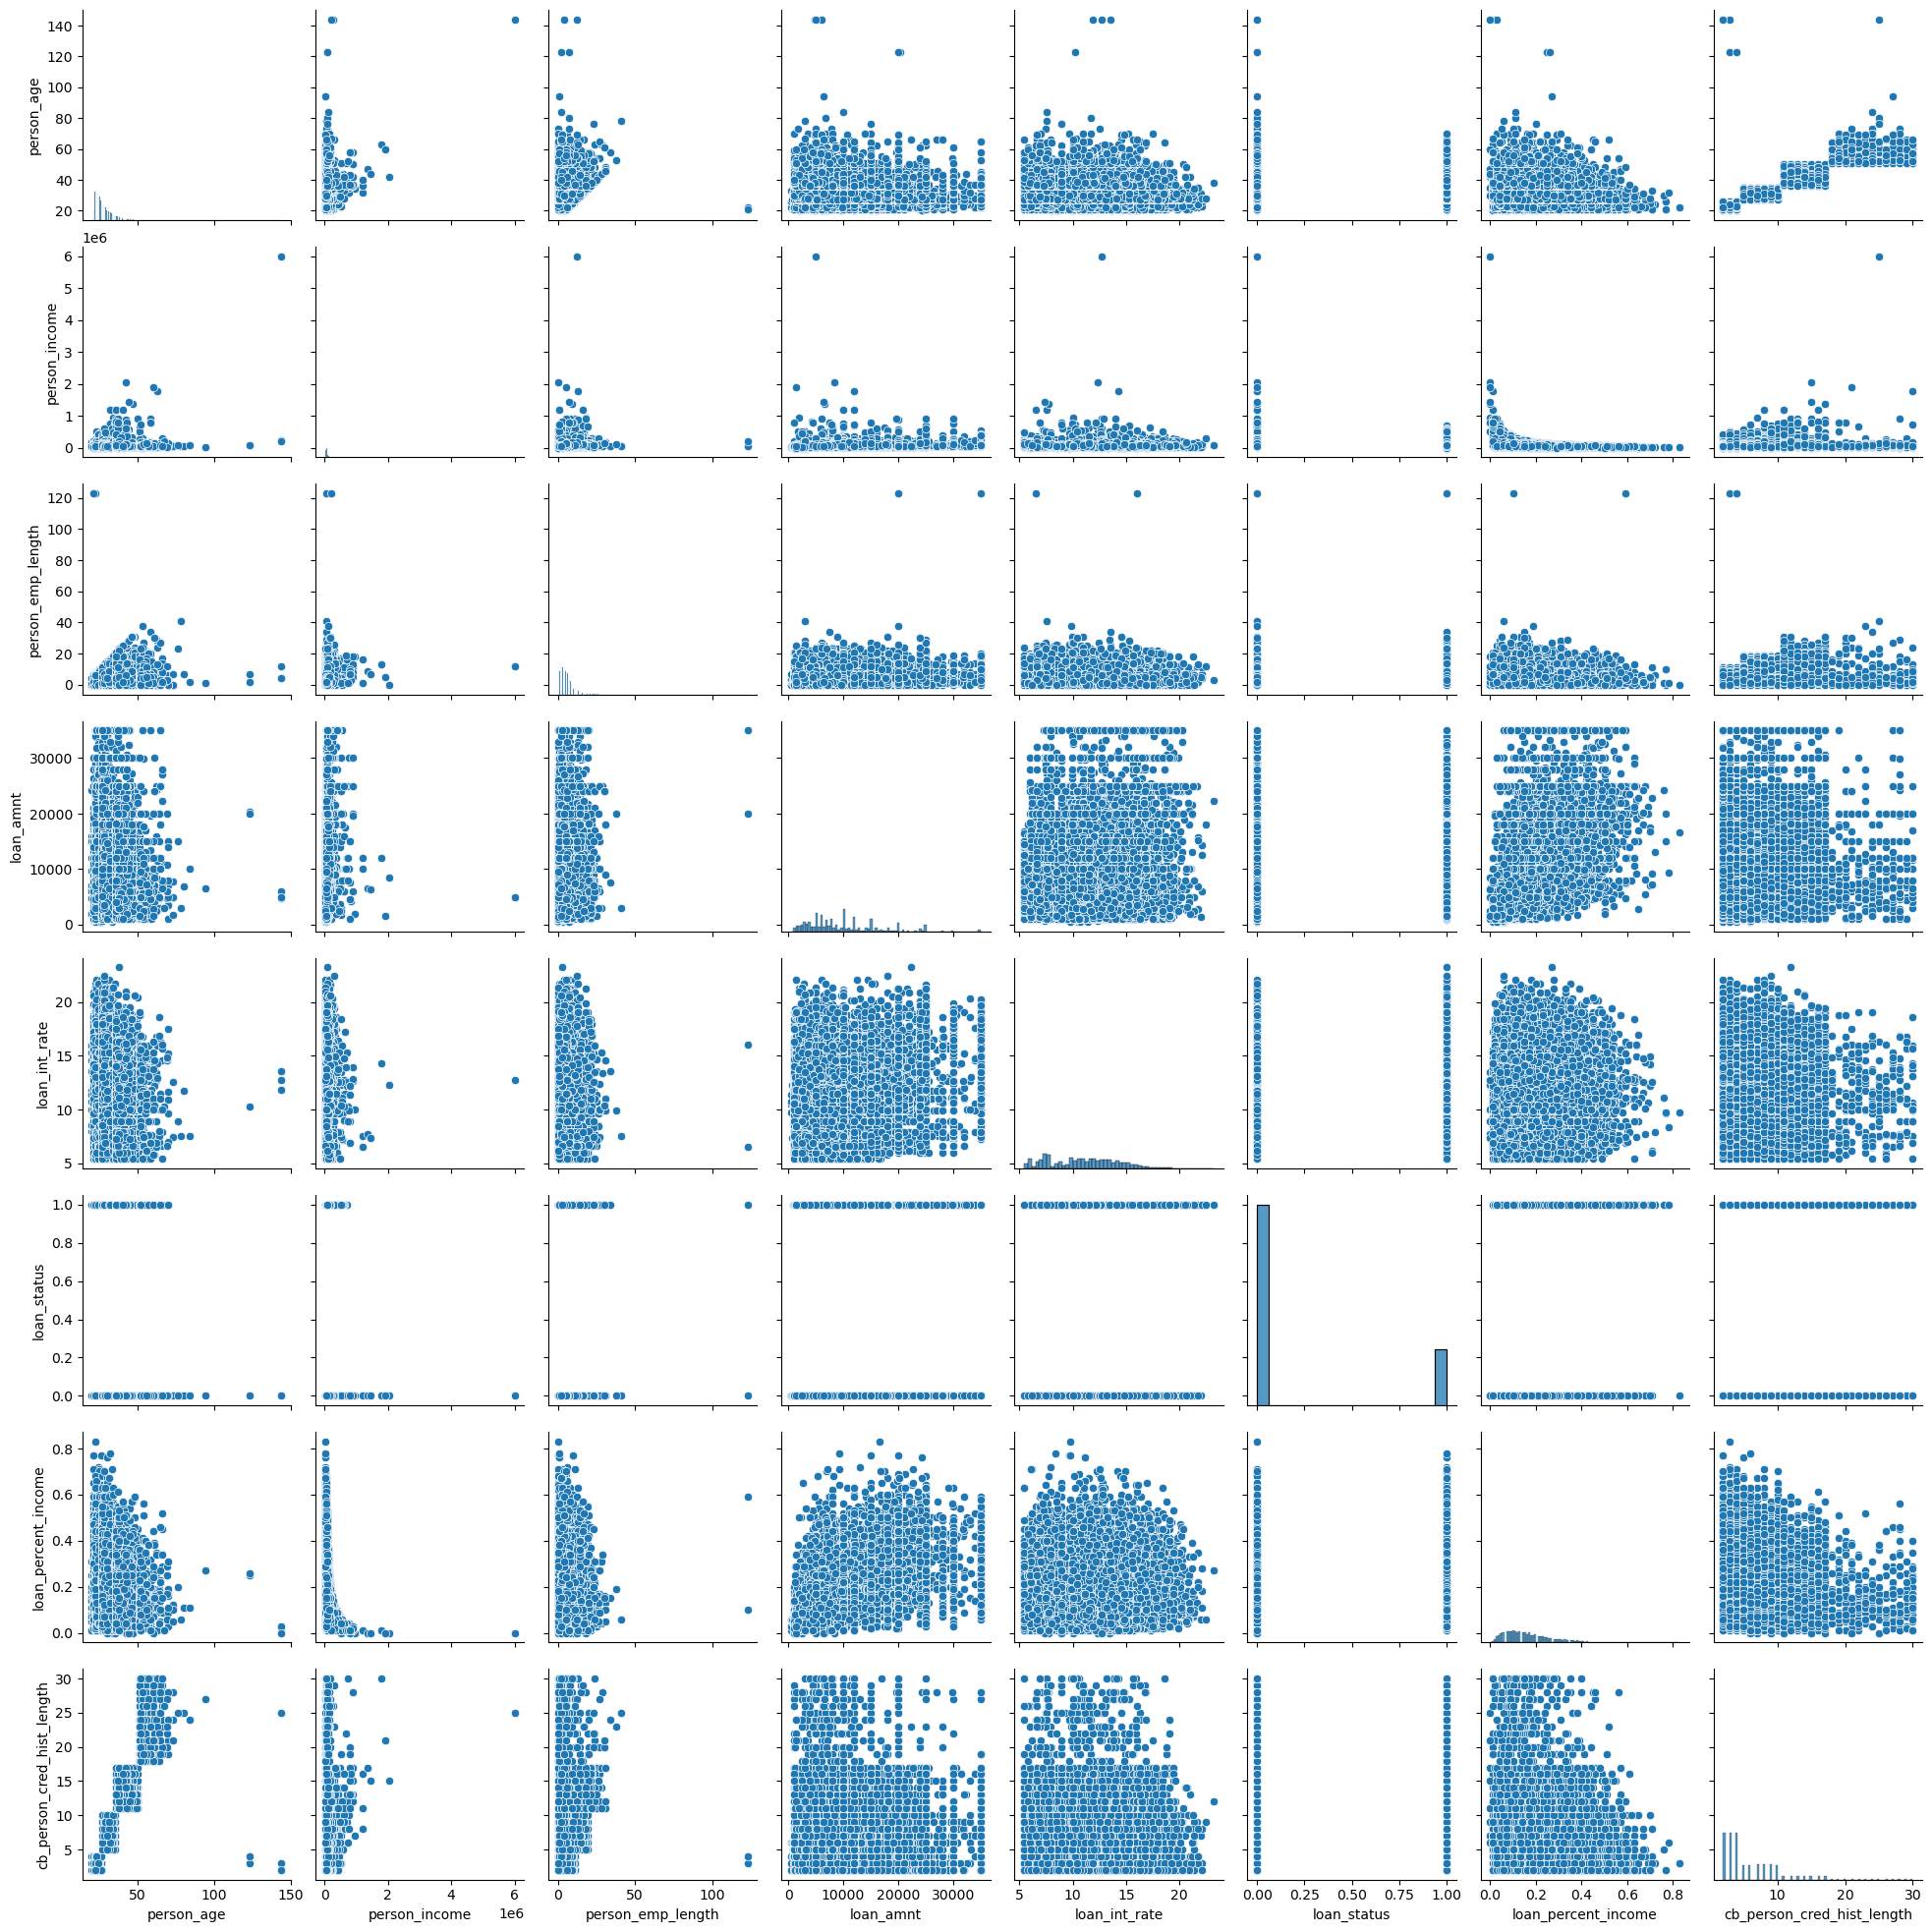

In [17]:
sns.pairplot(df)
plt.show()

Afin de mieux visualiser les histogrammes, nous pouvons aussi utiliser displot()

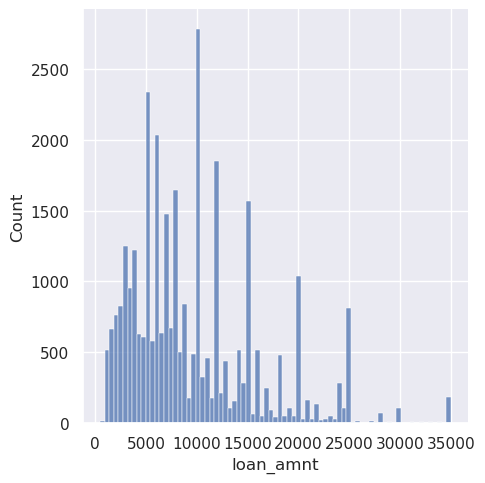

In [13]:
#distribution du montant du pret
sns.set(rc={'figure.figsize':(15,12)})
sns.displot(df['loan_amnt'])
plt.show()

<p>
certaines variables catégorielles(4 colonnes) sont de type object, nous allons les encoder afin d'en tirer une information
</p>

In [18]:

# Sélectionner les colonnes catégorielles
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)
# Afficher les valeurs uniques pour chaque colonne catégorielle
for col in categorical_columns:
    print(f"Valeurs uniques pour '{col}':")
    print(df[col].unique())
    print("\n")

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
Valeurs uniques pour 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


Valeurs uniques pour 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


Valeurs uniques pour 'loan_grade':
['D' 'B' 'C' 'A' 'E' 'F' 'G']


Valeurs uniques pour 'cb_person_default_on_file':
['Y' 'N']




<p>Ainsi les variables seront encodées comme suit:
<ul>
<li>person_home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER'] = [0, 1, 2, 3]
<li>loan_intent : ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION'] = [0, 1, 2, 3, 4, 5]
<li> loan_grade : ['A' 'B' 'C' 'D' 'E' 'F' 'G'] = [0, 1, 2, 3, 4, 5, 6]
<li> cb_person_default_on_file : ['Y' 'N'] = [1, 0]
 </ul>
</p>
 

In [19]:


# Encodage spécifique pour 'loan_grade'
loan_grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['loan_grade'] = df['loan_grade'].map(loan_grade_mapping)
#print(df['loan_grade'].head())

# Encodage spécifique pour 'cb_person_default_on_file'
cb_person_default_mapping = {'Y': 1, 'N': 0}
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(cb_person_default_mapping)
#print(df['cb_person_default_on_file'].head())

#encodage de person_home_ownership
person_home_ownership_mapping ={'RENT':0, 'OWN':1, 'MORTGAGE' : 2, 'OTHER' :3}
df['person_home_ownership'] = df['person_home_ownership'].map(person_home_ownership_mapping)
#encodage de loan_intent

loan_intent_mapping={'PERSONAL':0, 'EDUCATION' :1, 'MEDICAL' :2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4,
 'DEBTCONSOLIDATION':5}
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
# Vérifier le résultat
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,0,123.0,0,3,35000,16.02,1,0.59,1,3
1,21,9600,1,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,2,1.0,2,2,5500,12.87,1,0.57,0,3
3,23,65500,0,4.0,2,2,35000,15.23,1,0.53,0,2
4,24,54400,0,8.0,2,2,35000,14.27,1,0.55,1,4


<p>

Le coefficient d'asymétrie (ou skewness) mesure la symétrie de la distribution d'une variable dans un jeu de données. Il indique si les données sont réparties de manière équilibrée autour de leur moyenne. il est très important car certains modèles sont construits sous des hypothèses de normalité... (https://statorials.org/asymetrie-statistique/)
</p>

In [20]:
#coefficiants d'asymetrie
df.skew()

person_age                     2.581393
person_income                 32.865349
person_home_ownership          0.193639
person_emp_length              2.614455
loan_intent                    0.193253
loan_grade                     0.866563
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_default_on_file      1.698687
cb_person_cred_hist_length     1.661790
dtype: float64

<p>
Le coefficiant de la variable person_income est très élevé par rapport aux autres. Pour corriger cela, faisons une transformation logarithmique de cette variable
</p>

In [21]:
#transformation log de la var person_income
df['person_income'] = np.log(df['person_income'])
#coef d'asymetrie de person_income  
df['person_income'].skew()

np.float64(0.1559408016162584)

Nuage des points des revenus en fonction de l'age

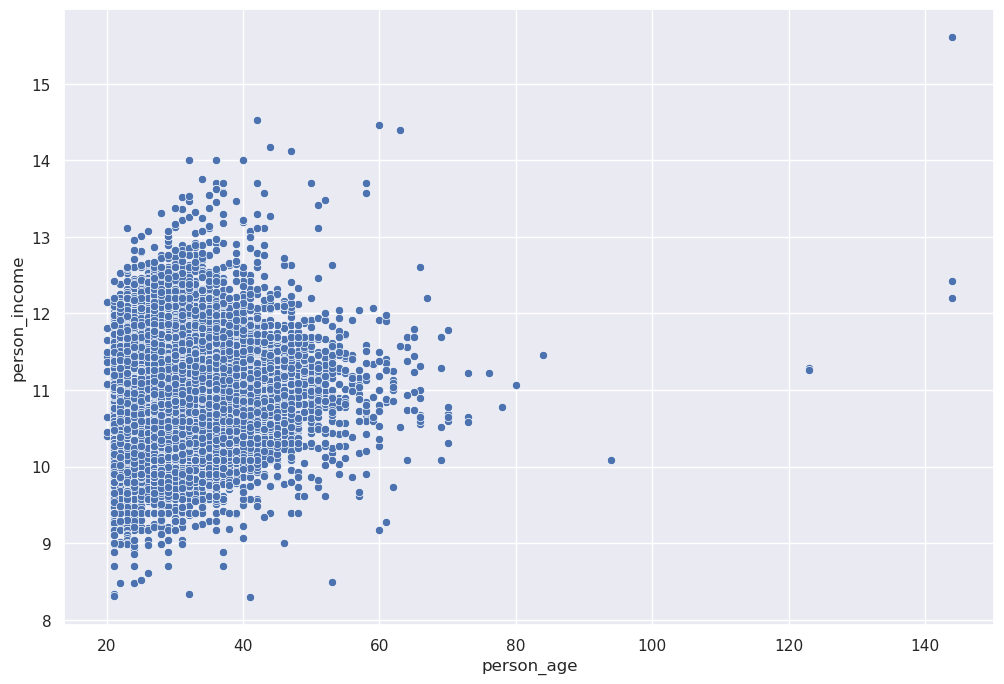

In [22]:
#distribution du montant du pret
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(x='person_age', y='person_income', data =df)
plt.show()

Nous constatons une très faible corrélation positive entre salaire et age. Nous remarquons des valeurs aberrantes qui sortent du lot.
<p>
Analysons à présent la fréquence des modalités de chaque variable catégorielle
</p>

In [23]:
col_categoriel=categorical_columns.tolist() + ['loan_status']
print(col_categoriel)

['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']


In [ ]:
#creation automatique du diagramme pour chaque variable
for col in col_categoriel:
    sns.set(rc={'figure.figsize':(12,8)})
    sns.countplot(df[col])
    plt.xlabel(col,fontweight='bold')
    plt.ylabel('Nombre',fontweight='bold')
    plt.xticks(rotation = 45)
    plt.title('Frequence des modalités de la variable '+  str(col), fontsize= 16, fontweight='bold')
    plt.show()
    print("\n")

<p>
Nous remarquons un déséquilibre de classe au niveau de la variable d'intéret(loan_status). Il y'a beaucoup plus de personnes qui n'ont pas été en défaut de paiement que de personne en défaut de paiement. Ce problème peut biaiser notre regression car ce dernier pourrait avoir tendance à prédire que, tous les nouveaux demandeurs de crédit ne seront pas en défaut de paiement. Nous utiliserons le <b>Random Forrest</b> lors de la modélisation pour corriger ce problème
</p>

<p>
Construisons à présent des tableaux croisés dynamiques afin d'analyser ces données (très souvent utilisés sous Excel pour les  données financières)
</p>

In [25]:
#tableau entre le motif de pret et le statut de pret
pd.crosstab(df["loan_intent"],df["loan_status"],margins= True)

loan_status,0,1,All
loan_intent,,,
0,4423,1098,5521
1,5342,1111,6453
2,4450,1621,6071
3,4872,847,5719
4,2664,941,3605
5,3722,1490,5212
All,25473,7108,32581


## interpretation
<p>
<ul>

<li>Le motif de prêt 0 (probablement PERSONAL) a généré 5 521 prêts, dont 1 098 remboursés et 4 423 non remboursés.
<li>Le motif 2 (MEDICAL) a le plus haut taux de remboursement avec 1 621 sur 6 071 prêts.
<li>Les motifs 4 (HOMEIMPROVEMENT) et 5 (DEBTCONSOLIDATION) montrent des comportements différents en termes de remboursement :
<li>5(DEBTCONSOLIDATION) a une proportion plus élevée de remboursements (1 490 sur 5 212)
</ul>
</p>

In [12]:
#tableau croisé dynamique de l'accès à la propriété groupé par le status ainsi que le grade du crédit
pd.crosstab(df["person_home_ownership"],df["loan_status"],df['loan_grade'], aggfunc='count')

loan_status,0,1
person_home_ownership,,
0,11254,5192
1,2391,193
2,11754,1690
3,74,33


## interpretation
<p>
<ul>
Ce tableau montre la répartition du statut du prêt (loan_status) pour chaque type d'accès à la propriété (person_home_ownership).
<br/>
loan_status = 0 (Prêt non remboursé) :
<li>Les emprunteurs ayant un logement en location (0) représentent la majorité des prêts non remboursés (11 254 cas).
<li>Les emprunteurs avec un logement hypothéqué (2) arrivent en deuxième position avec 11 754 cas.
<li>Les cas les moins fréquents concernent ceux ayant un type d'accès à la propriété autre (3) (74 cas).
<br/>
loan_status = 1 (Prêt remboursé) :
<li>Les emprunteurs en location (0) ont remboursé 5 192 prêts.
<li>Les propriétaires hypothéqués (2) ont remboursé 1 690 prêts.
<li>Les emprunteurs avec un accès à la propriété autre (3) ont remboursé 33 prêts.
</ul>
</p>
<br/>
Conclusion :
Les locataires (0) et les propriétaires hypothéqués (2) constituent les groupes principaux, tant pour les prêts remboursés que pour ceux non remboursés. Cependant, le taux de remboursement est proportionnellement plus faible chez les locataires.

In [13]:
#tableau croisé dynamique du pourcentage moyen du revenu par rapport au montant du pret groupé par les var 'person_home_ownership' et 'loan_status'
pd.crosstab(df["person_home_ownership"],df["loan_status"],df['loan_grade'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
0,1.066110,1.988829
1,1.099540,1.782383
2,0.890165,2.224852
3,1.162162,2.545455


## interpretation
<p>
<ul>
Le tableau présente le pourcentage moyen du revenu consacré au prêt (loan_percent_income) selon le statut du prêt (loan_status) et le type de propriété (person_home_ownership).
<br/>
loan_status = 0 (Prêt non remboursé) :
<li>Locataires (RENT = 0) : 1.066 fois le revenu moyen consacré au prêt.
<li>Propriétaires (OWN = 1) : 1.099 fois, légèrement plus élevé que les locataires.
<li>Hypothèques (MORTGAGE = 2) : 0.890, le plus faible.
<li>Autres (OTHER = 3) : 1.162, légèrement supérieur aux locataires.
<br/>
loan_status = 1 (Prêt remboursé) :
<li>Locataires (0) : 1.989, une nette augmentation par rapport aux non-remboursés.
<li>Propriétaires (1) : 1.782.
<li>Hypothèques (2) : 2.224, un bond significatif.
<li>Autres (3) : 2.545, le pourcentage le plus élevé.
</ul>
</p>
<br/>
Conclusion :
<ul>
<li>Les emprunteurs hypothéqués (2) consacrent un faible pourcentage pour les prêts non remboursés mais augmentent considérablement pour les remboursés.
<li>Les autres types (3) consacrent le pourcentage le plus élevé, surtout pour les prêts remboursés.
<li>Les locataires (0) et propriétaires (1) restent constants mais montrent une augmentation pour les prêts remboursés.
</ul>

## Quelle est la relation entre le pourcentage du revenu et le statut du crédit?

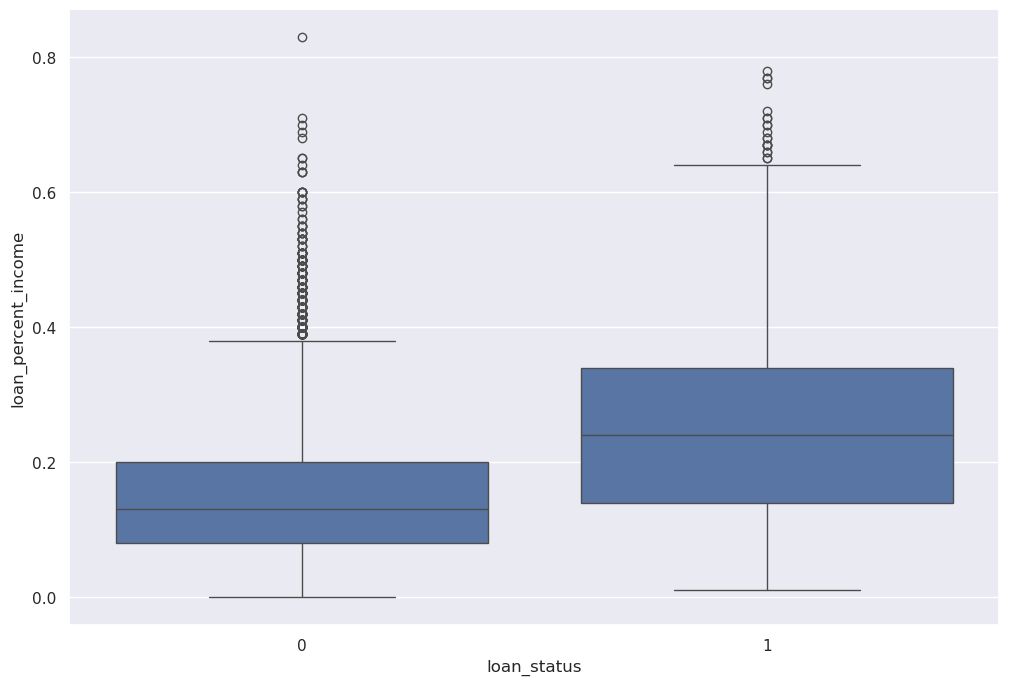

In [15]:
sns.boxplot(x='loan_status', y='loan_percent_income',data=df)
plt.show()

<p>
Ce boxplot compare la part de revenu consacrée au prêt (loan_percent_income) selon le statut du prêt (loan_status). La médiane est plus élevée pour la deuxième catégorie, indiquant une charge plus importante. On observe aussi de nombreux outliers, montrant une forte variabilité.
</p>
<p>
Ce graphique suggère une corrélation possible entre le statut de remboursement du prêt et la part de revenu consacrée à ce remboursement. Les personnes ayant un loan_status défavorable semblent souvent avoir des charges de prêt proportionnellement plus importantes, ce qui est logique.
</p>

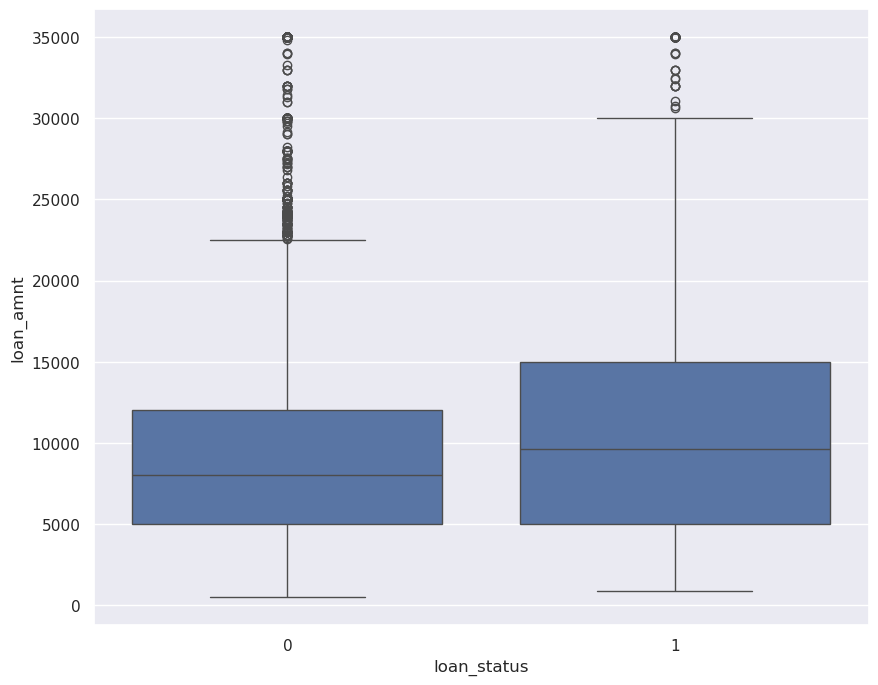

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='loan_status', y='loan_amnt',data=df)
plt.show()

<p>
Ce boxplot compare les montants de prêts (loan_amnt) selon le statut du prêt (loan_status).

Analyse :
La médiane des montants est légèrement plus élevée pour la catégorie 1.
<br/>
La dispersion des montants est similaire entre les deux catégories, mais les prêts de la catégorie 0 ont davantage d'outliers dépassant 25 000.
</br>
Les valeurs extrêmes suggèrent des emprunts élevés pour certains cas.
<br/> Globalement, les personnes en défaut de paiement ont une dette supérieur à celle de ceux qui ont pu la rembourser.
</p>

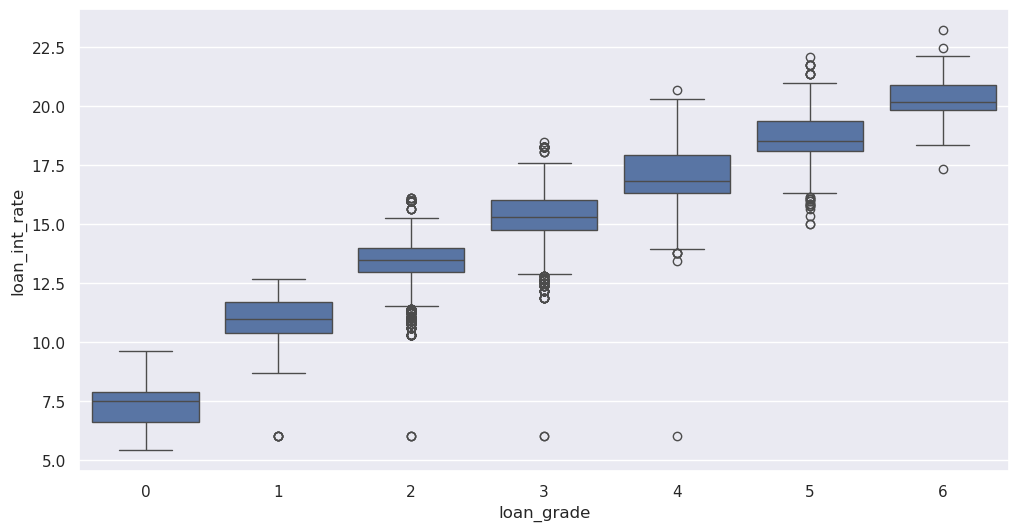

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(x='loan_grade', y='loan_int_rate',data=df)
plt.show()

Ce boxplot montre que le taux d'intérêt (loan_int_rate) augmente avec le grade du prêt (loan_grade). Les grades élevés ont des taux plus élevés et une plus grande variabilité, avec davantage d'outliers.

<br/>
<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 30px; color:rgb(226, 93, 31)">
<ul style="list-style-type: square;">
<li>
CARTE DES CORRELATIONS
</li>
</ul> 
</h1>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 3.0 MB


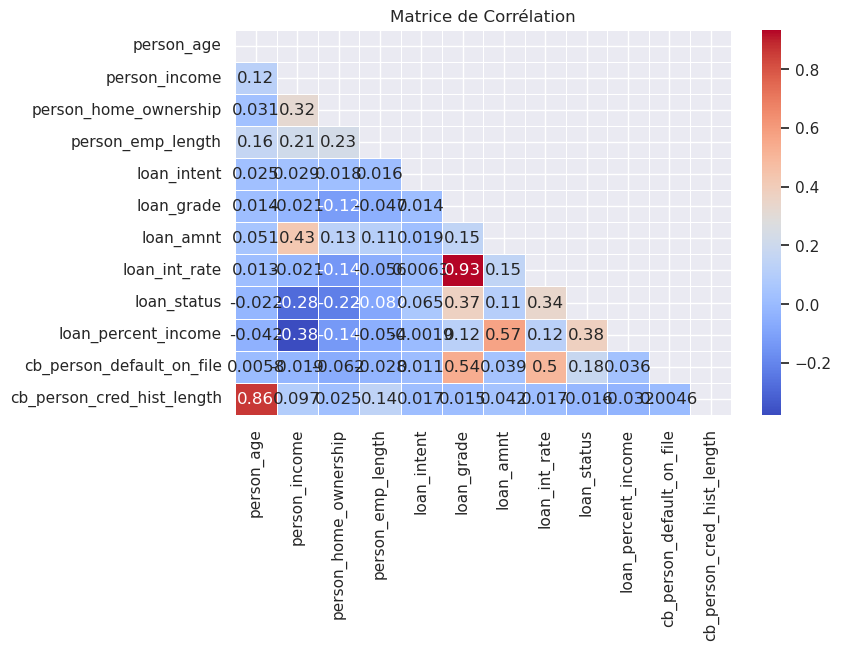

In [27]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Création du mask pour le triangle supérieur
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création du heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

Les relations les plus intéressantes sont entre les variables financières comme les notes de prêts (loan_grade), les taux d'intérêt (loan_int_rate) et la durée du crédit par rapport à l'âge (cb_person_cred_hist_length).

<br/>
<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Nettoyage Des Données
</h1>
<br/>

<p>
Lors de l'analyse exploratoire des données, nous avons remarqué la présence d'outliers. ces variables pouvant affecter la qualité du modèle, elles seront retirées.
</p>
<p>
De plus dans cette Base de données nous observons des clients de plus de 100 ans voir meme 140 ans. Or, le bon sens nous dit qu'il est très peu probable de vivre aussi longtemps(). Nous allons donc supprimer ce type d'individu afin que les résultats soient plus plausible.
</p>


<br/>
<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 30px; color:rgb(226, 93, 31)">
<ul style="list-style-type: square;">
<li>
Méthodes de Detection des valeurs aberrantes basée sur l'Inter-Quartile(IQR)
</li>
</ul> 
</h1>

selon cette methode, une variable est aberrante si elle n'appartient pas à l'intervalle [Q1-1,5*IQR; Q3+1,51QR] avec IQR= Q3-Q1

In [32]:
def detection_outliers_by_iqr(y):
    y = np.array(y)
    Q1, Q3 = np.quantile(y, 0.25), np.quantile(y,0.75)
    iqr= Q3-Q1
    borne_inf = Q1-1.5*iqr
    borne_sup= Q3+1.5*iqr
    return np.where( (y>borne_sup) | (y<borne_inf))


<br/>
<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 22px; color:rgb(226, 93, 31)">
<ul style="list-style-type: circle;">
<li>
supression des outliers
</li>
</ul> 
</h1>

In [34]:

y = df['person_age']
print(np.quantile(y, 0.75))
indices_outliers_age = detection_outliers_by_iqr(y)
print(indices_outliers_age)
df.drop(indices_outliers_age[0], inplace=True) #le tableau numpy est le 1er element du tuple
df.shape

30.0
(array([   81,   183,   575, ..., 32578, 32579, 32580], shape=(1494,)),)


(31087, 12)

En supprimant les outliers, l'ensemble des données est passé de 32580 à 31087 observations

<br/>
<h1 style="font-family: 'Georgia', serif; text-align: left; font-size: 22px; color:rgb(226, 93, 31)">
<ul style="list-style-type: circle;">
<li>
Valeurs manquantes
</li>
</ul> 
</h1>

In [35]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              861
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2953
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Nous allons supprimer les lignes ayants 20% de valeurs manquantes et imputer par la médiane les autres

In [36]:
# Suppression des lignes ayant plus de 20% de valeurs manquantes
seuil = 0.2 * df.shape[1]
df = df.dropna(thresh=int(df.shape[1] - seuil))

# Imputation des valeurs manquantes restantes par la médiane
df = df.fillna(df.median(numeric_only=True))

print(df.isna().sum())  # Vérification après traitement


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [37]:
data_treated=df.to_csv("data_treated")

La BD ne contient plus de ligne avec des valeurs manquantes, et toutes les variables catégorielles sont numériques nous pouvons donc en tirer une information. nous allons passer à la modelisation